24 Trace(s) in Stream:

.3004876..EPE | 2025-03-19T02:25:58.000000Z - 2025-03-19T03:11:58.000000Z | 100.0 Hz, 276001 samples
...
(22 other traces)
...
.3005274..EPZ | 2025-03-19T02:21:58.000000Z - 2025-03-19T03:13:58.000000Z | 100.0 Hz, 312001 samples

[Use "print(Stream.__str__(extended=True))" to print all Traces]


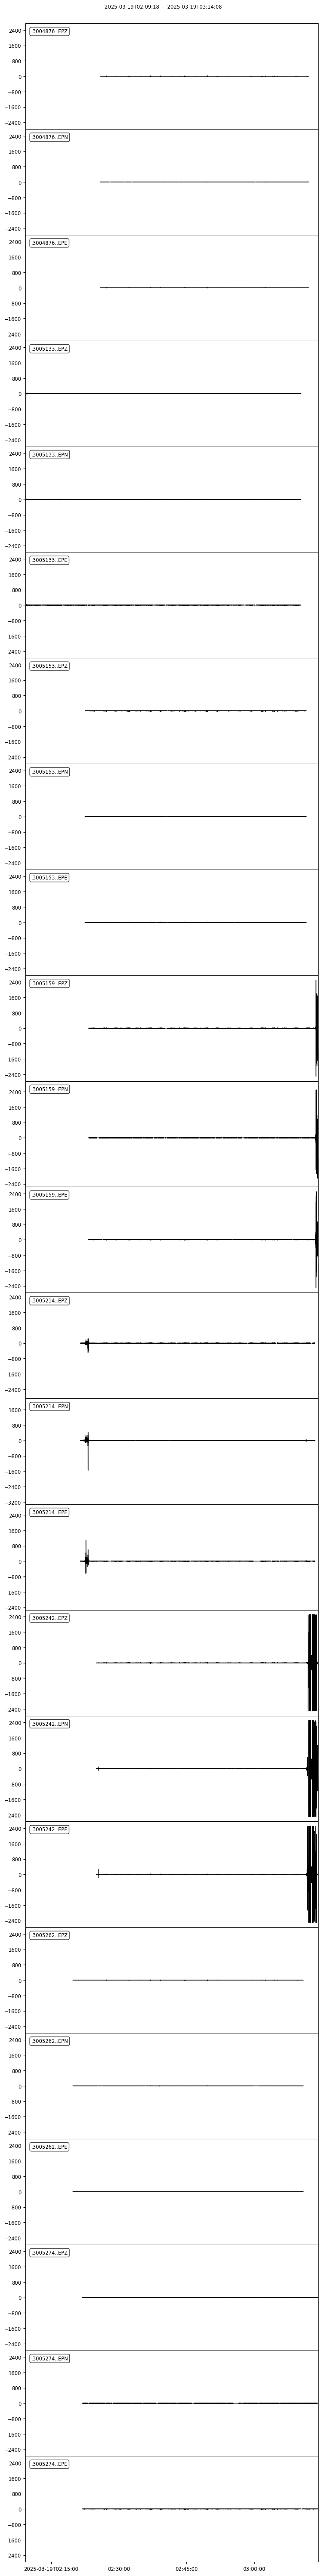

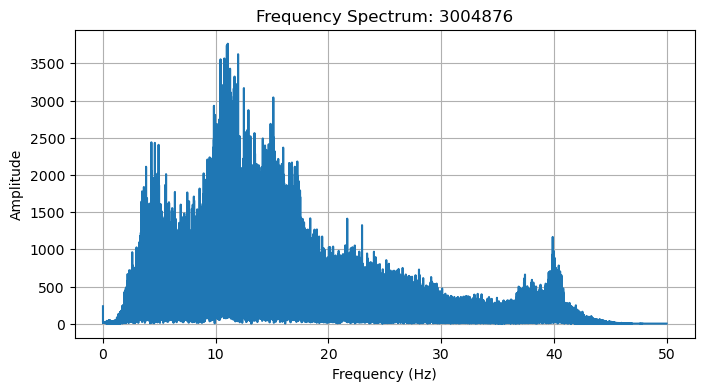

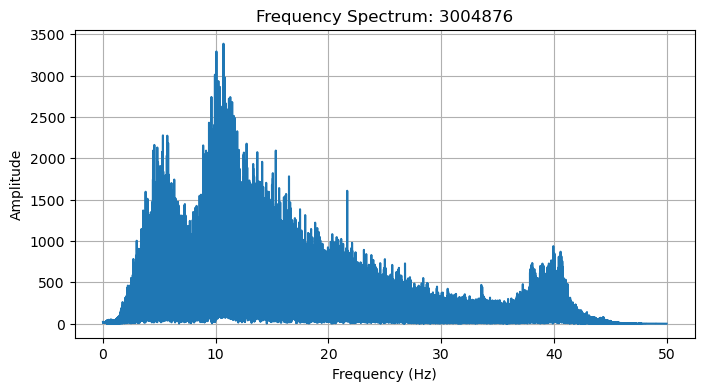

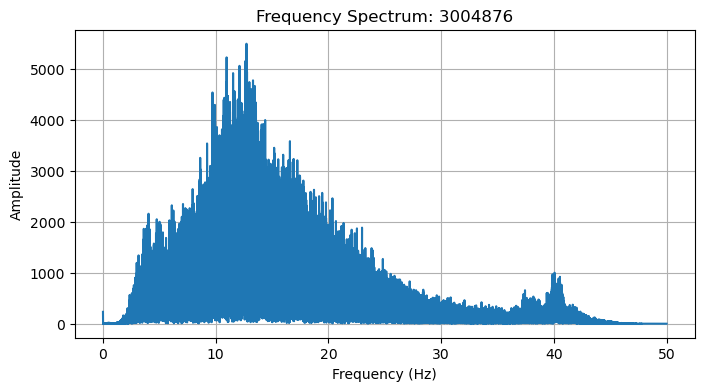

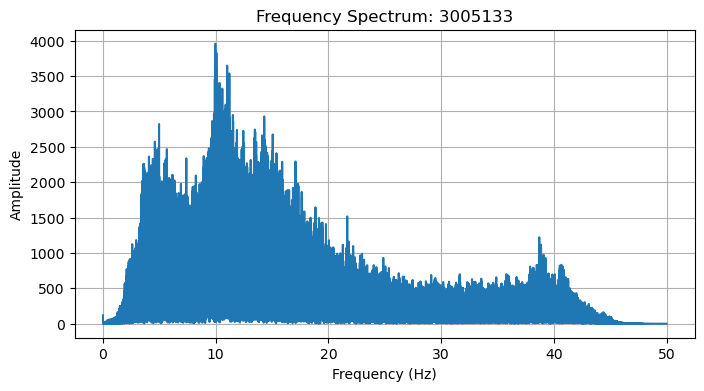

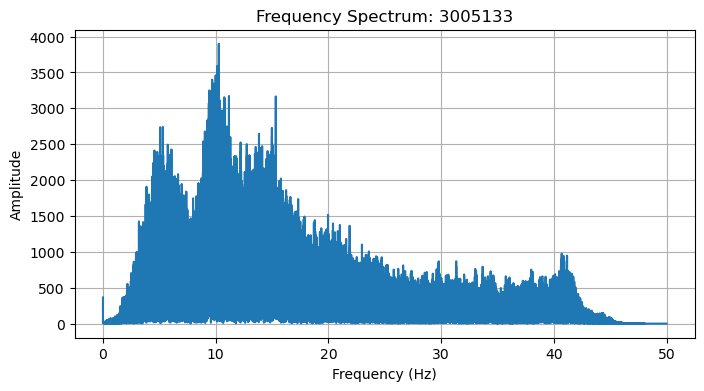

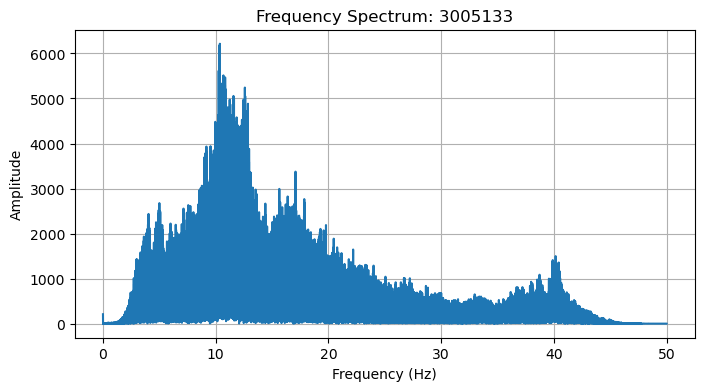

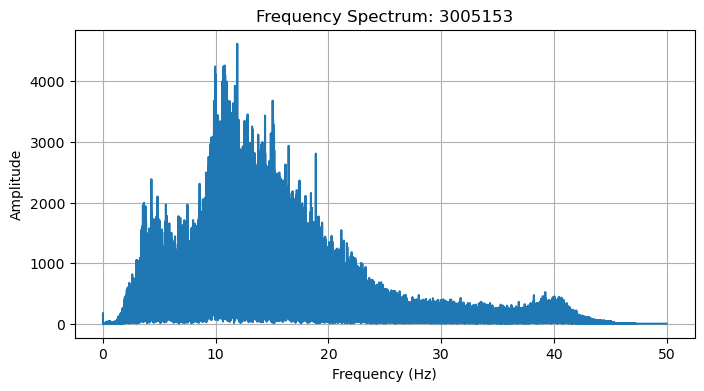

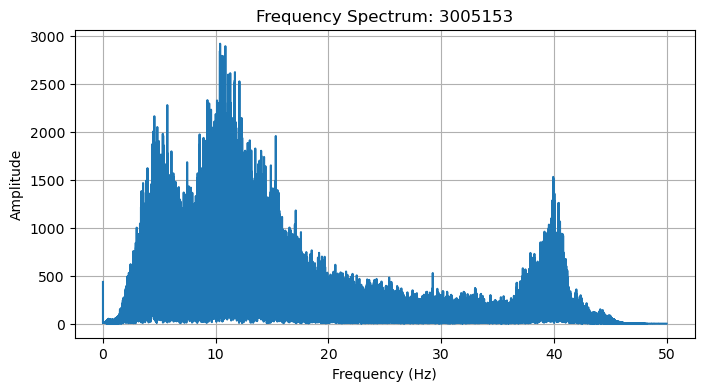

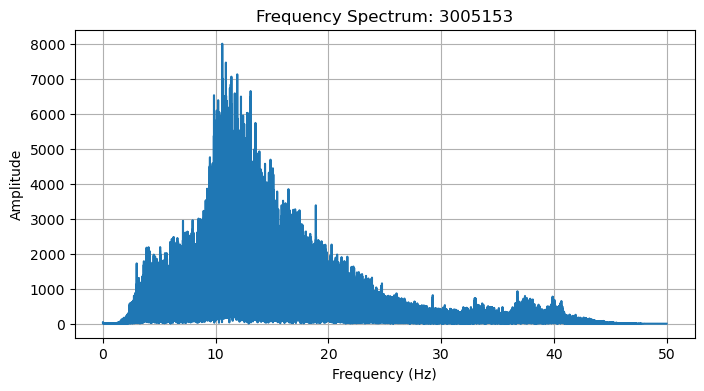

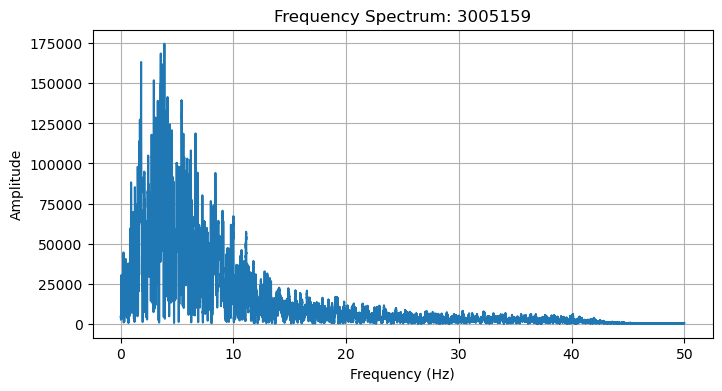

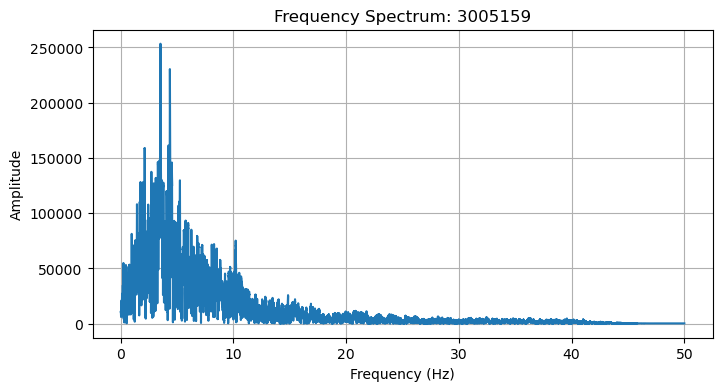

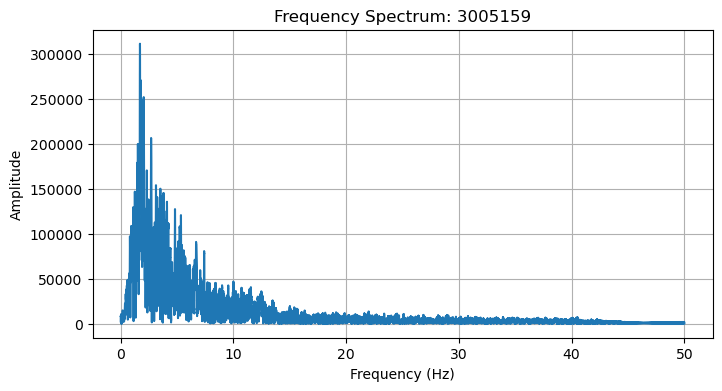

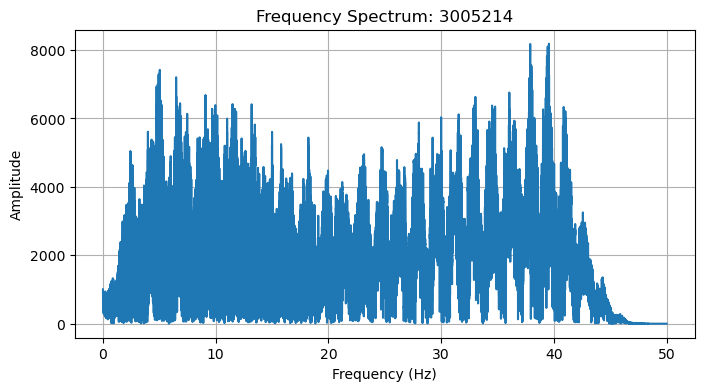

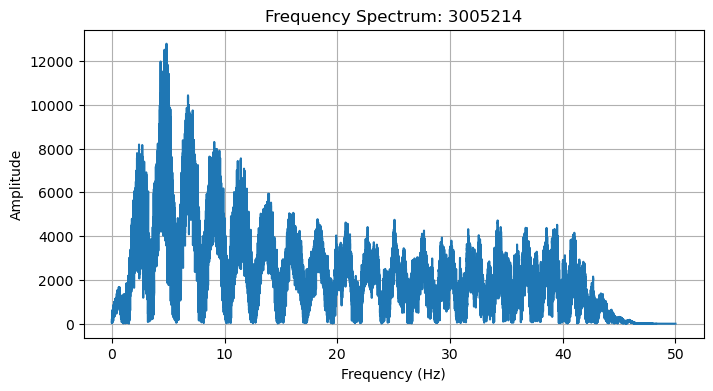

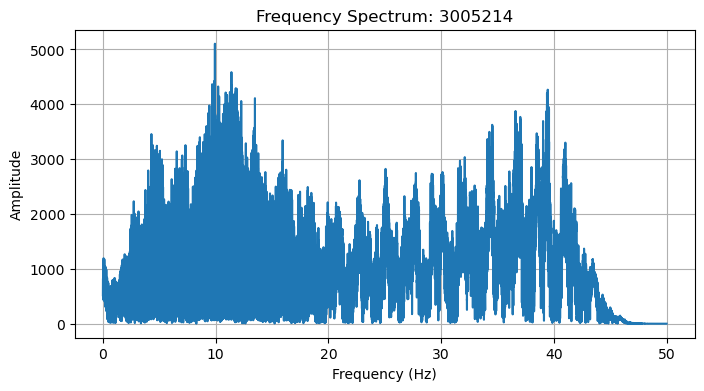

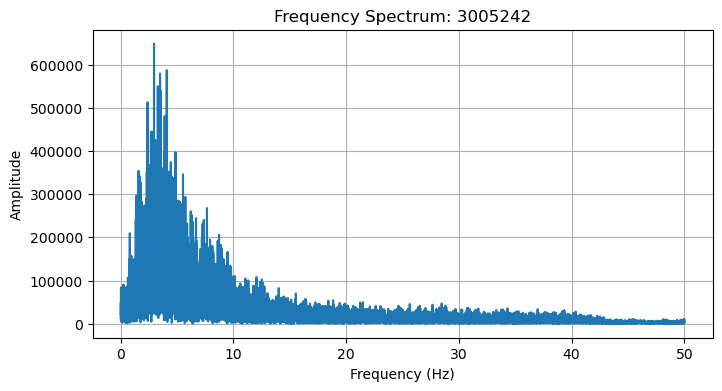

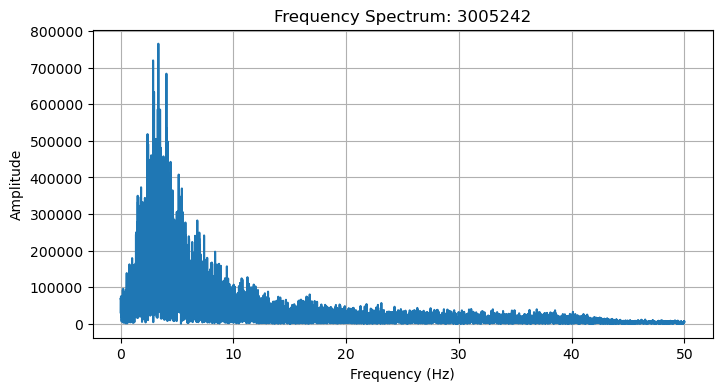

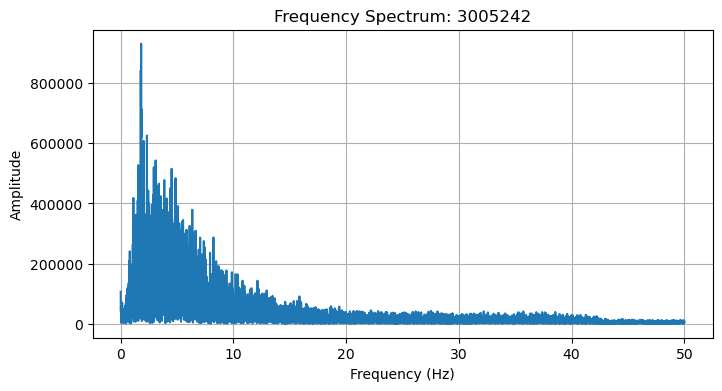

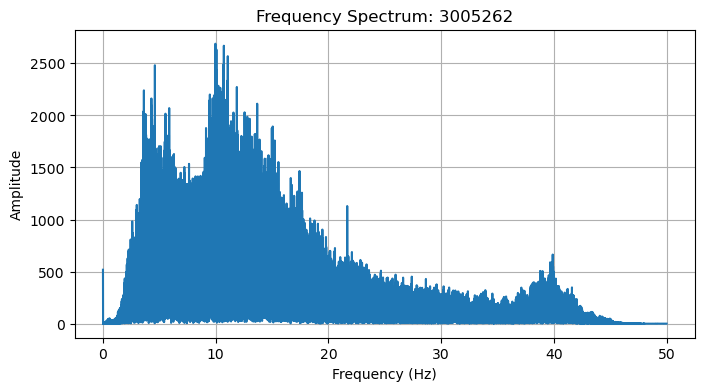

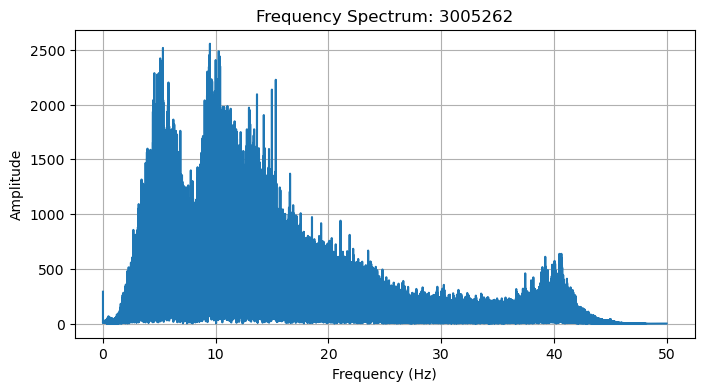

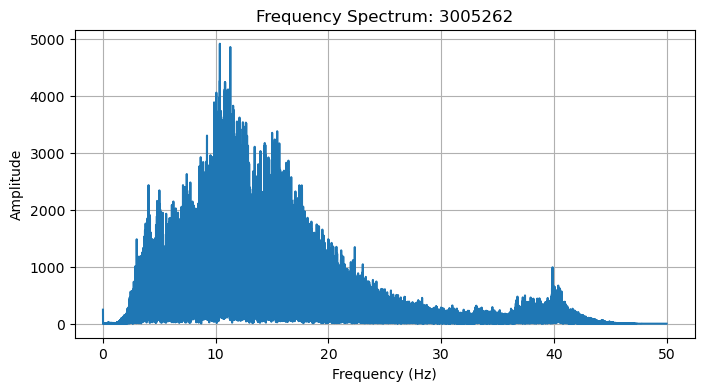

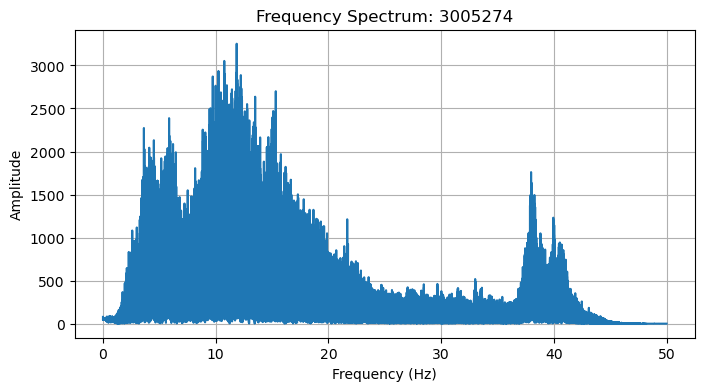

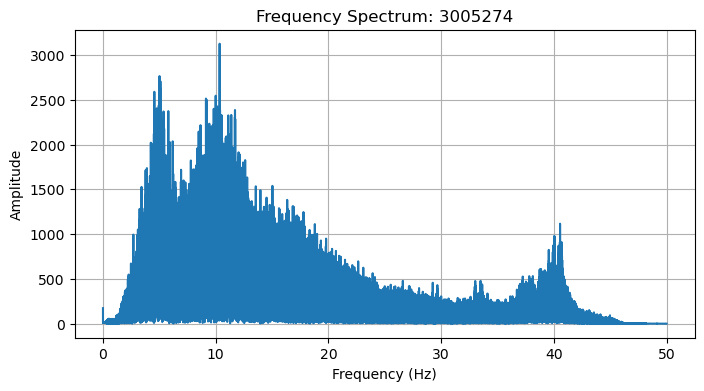

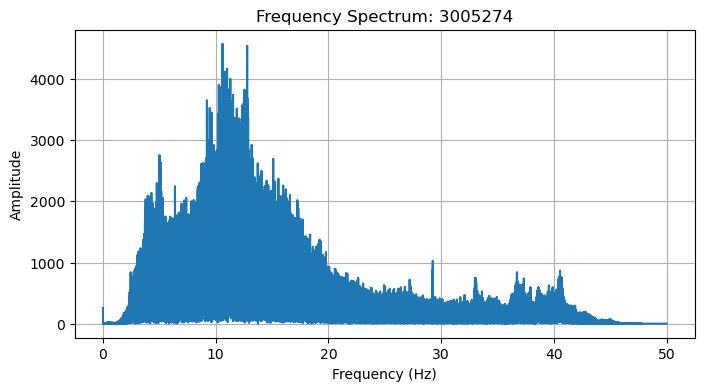

In [ ]:
from obspy import read
import glob
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, fftfreq

# 設定 SAC 資料夾的路徑
sac_folder = r"C:\Users\user\Downloads\sac"  # Windows 注意路徑前面加 r 避免轉義

# 找出所有 SAC 檔案
sac_files = glob.glob(os.path.join(sac_folder, "*.sac"))

# 確保資料夾內有檔案
if not sac_files:
    print("未找到 SAC 檔案，請檢查資料夾路徑！")
else:
    # 讀取所有 SAC 檔案
    st = read(sac_files[0])  # 先讀取第一個檔案初始化 Stream
    for sac_file in sac_files[1:]:  # 讀取剩下的檔案
        st += read(sac_file)
    
    # 合併重疊的波形（如果有）
    st.merge(method=1)
    
    # 顯示 SAC 檔案資訊
    print(st)
    
    # 繪製所有波形
    st.plot()
    
    # 頻譜分析
    for tr in st:
        npts = tr.stats.npts  # 資料點數
        delta = tr.stats.delta  # 取樣間隔（秒）
        data = tr.data  # 波形數據

        # 進行 FFT（快速傅立葉變換）
        freqs = fftfreq(npts, delta)  # 計算頻率軸
        fft_values = fft(data)  # 計算 FFT
        amplitude_spectrum = np.abs(fft_values)  # 計算振幅

        # 繪製頻譜圖
        plt.figure(figsize=(8, 4))
        plt.plot(freqs[:npts//2], amplitude_spectrum[:npts//2])  # 只顯示正頻率部分
        plt.xlabel("Frequency (Hz)")
        plt.ylabel("Amplitude")
        plt.title(f"Frequency Spectrum: {tr.stats.station}")
        plt.grid()
        plt.show()

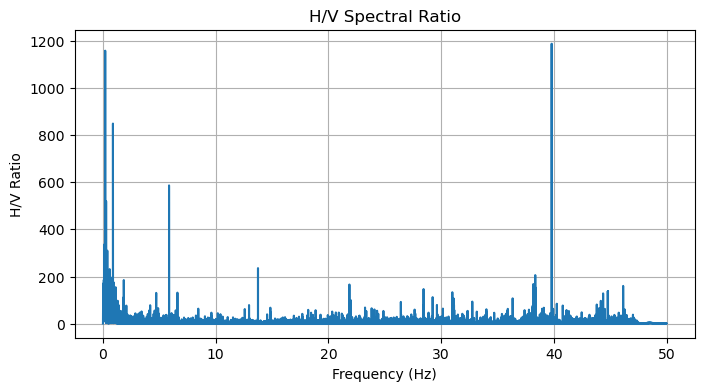

In [ ]:
from obspy import read
import glob
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, fftfreq

# 設定 SAC 檔案的資料夾
sac_folder = r"C:\Users\user\Downloads\sac"

# 找出所有 SAC 檔案
sac_files = glob.glob(os.path.join(sac_folder, "*.sac"))

# 建立字典存放三分量數據
traces = {"E": None, "N": None, "Z": None}

# 讀取並分類 E, N, Z 分量
for sac_file in sac_files:
    if sac_file.endswith(".Z.sac"):
        traces["Z"] = read(sac_file)[0]
    elif sac_file.endswith(".E.sac"):
        traces["E"] = read(sac_file)[0]
    elif sac_file.endswith(".N.sac"):
        traces["N"] = read(sac_file)[0]

# 檢查是否有完整的三分量
if None in traces.values():
    print("❌ 缺少 E/N/Z 三分量，請確認檔案是否完整！")
else:
    # 取得基本資訊
    npts = traces["Z"].stats.npts  # 資料點數
    delta = traces["Z"].stats.delta  # 取樣間隔（秒）

    # 取得數據
    data_E = traces["E"].data
    data_N = traces["N"].data
    data_Z = traces["Z"].data

    # 計算 FFT
    freqs = fftfreq(npts, delta)  # 計算頻率軸
    fft_E = np.abs(fft(data_E))  # 計算東向 FFT 振幅
    fft_N = np.abs(fft(data_N))  # 計算北向 FFT 振幅
    fft_Z = np.abs(fft(data_Z))  # 計算垂直向 FFT 振幅

    # 計算水平振幅 H = sqrt(E^2 + N^2)
    fft_H = np.sqrt(fft_E**2 + fft_N**2)

    # 計算 H/V 比值
    hv_ratio = fft_H / fft_Z

    # 繪製 H/V 頻譜圖
    plt.figure(figsize=(8, 4))
    plt.plot(freqs[:npts//2], hv_ratio[:npts//2])  # 只顯示正頻率部分
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("H/V Ratio")
    plt.title("H/V Spectral Ratio")
    plt.grid()
    plt.show()
